In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import time

In [2]:
# import the global_weather data
global_weather = pd.read_csv('global_nasa_weather_data.csv')
global_weather

,Unnamed: 0,date,country,country_code,lat,long,elevation,specific_humidity,surface_pressure,skin_temperature,...,windspeed10m,windspeed50m,wet_bulb_temp,temp_range,rel_humidity,clearness_index,clear_sky_insolation,all_sky_insolation,radiative_flux,precipitation
0,0,1981-01-01,Andorra,AD,1.5,42.5,1216.58,3.78,89.39,-1.60,...,4.93,6.96,-1.91,6.50,98.04,-999.00,-999.0,-999.00,-999.00,4.51
1,1,1981-01-02,Andorra,AD,1.5,42.5,1216.58,3.34,89.28,-2.87,...,4.28,5.81,-3.46,4.30,95.14,-999.00,-999.0,-999.00,-999.00,1.62
2,2,1981-01-03,Andorra,AD,1.5,42.5,1216.58,3.75,88.74,-2.06,...,3.99,5.97,-2.21,5.73,99.22,-999.00,-999.0,-999.00,-999.00,0.32
3,3,1981-01-04,Andorra,AD,1.5,42.5,1216.58,4.88,88.18,1.89,...,6.77,9.83,1.48,4.46,97.88,-999.00,-999.0,-999.00,-999.00,3.75
4,4,1981-01-05,Andorra,AD,1.5,42.5,1216.58,3.13,88.68,-3.23,...,5.18,7.13,-4.36,4.97,92.19,-999.00,-999.0,-999.00,-999.00,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506395,14605,2020-12-27,Zimbabwe,ZW,30.0,-20.0,1204.44,15.01,87.90,24.84,...,2.50,4.03,18.25,12.08,71.19,0.60,-999.0,7.01,9.58,5.90
3506396,14606,2020-12-28,Zimbabwe,ZW,30.0,-20.0,1204.44,15.82,87.93,24.22,...,3.04,4.93,19.14,9.44,75.20,0.49,-999.0,5.67,9.44,13.73
3506397,14607,2020-12-29,Zimbabwe,ZW,30.0,-20.0,1204.44,14.98,87.92,24.48,...,3.25,5.17,18.25,10.56,71.46,0.69,-999.0,8.03,8.95,0.20
3506398,14608,2020-12-30,Zimbabwe,ZW,30.0,-20.0,1204.44,14.57,87.81,22.78,...,3.69,5.44,17.76,10.83,76.16,0.24,-999.0,2.83,9.51,4.80


## Adding another feature Forest Cover from another dataset

In [3]:
global_weather.isnull().sum()

Unnamed: 0                  0
date                        0
country                     0
country_code            14610
lat                         0
long                        0
elevation                   0
specific_humidity           0
surface_pressure            0
skin_temperature            0
dew_frost                   0
temperature2m               0
windspeed10m                0
windspeed50m                0
wet_bulb_temp               0
temp_range                  0
rel_humidity                0
clearness_index             0
clear_sky_insolation        0
all_sky_insolation          0
radiative_flux              0
precipitation               0
dtype: int64

In [4]:
# update the NaN value for Namibia with correct country code

# For one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
# For one column using numpy: df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)
# For the whole DataFrame using pandas: df.fillna(0)
# For the whole DataFrame using numpy: df.replace(np.nan, 0)

#precipitation.fillna('NA')
# precipitation[precipitation['country_code'].isna()]

global_weather.country_code = global_weather.country_code.fillna('NA')
print('Null Values in Global Weather Data: ', global_weather.isnull().sum())
global_weather[global_weather['country_code'] == 'NA']
global_weather['date'] = pd.to_datetime(global_weather['date'])
global_weather.info()
# make new columns year and country_year to merge the data from ForestCover
global_weather['year'] = global_weather['date'].dt.year.astype('str')
global_weather['country_year'] = global_weather['country_code'] + '_' + global_weather['year']
global_weather = global_weather.drop(columns=['Unnamed: 0', 'year'])
global_weather.head()

Null Values in Global Weather Data:  Unnamed: 0              0
date                    0
country                 0
country_code            0
lat                     0
long                    0
elevation               0
specific_humidity       0
surface_pressure        0
skin_temperature        0
dew_frost               0
temperature2m           0
windspeed10m            0
windspeed50m            0
wet_bulb_temp           0
temp_range              0
rel_humidity            0
clearness_index         0
clear_sky_insolation    0
all_sky_insolation      0
radiative_flux          0
precipitation           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506400 entries, 0 to 3506399
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   date                  datetime64[ns]
 2   country               object        
 3   country_code          object        
 4   lat     

,date,country,country_code,lat,long,elevation,specific_humidity,surface_pressure,skin_temperature,dew_frost,...,windspeed50m,wet_bulb_temp,temp_range,rel_humidity,clearness_index,clear_sky_insolation,all_sky_insolation,radiative_flux,precipitation,country_year
0,1981-01-01,Andorra,AD,1.5,42.5,1216.58,3.78,89.39,-1.60,-1.92,...,6.96,-1.91,6.50,98.04,-999.0,-999.0,-999.0,-999.0,4.51,AD_1981
1,1981-01-02,Andorra,AD,1.5,42.5,1216.58,3.34,89.28,-2.87,-3.47,...,5.81,-3.46,4.30,95.14,-999.0,-999.0,-999.0,-999.0,1.62,AD_1981
2,1981-01-03,Andorra,AD,1.5,42.5,1216.58,3.75,88.74,-2.06,-2.22,...,5.97,-2.21,5.73,99.22,-999.0,-999.0,-999.0,-999.0,0.32,AD_1981
3,1981-01-04,Andorra,AD,1.5,42.5,1216.58,4.88,88.18,1.89,1.48,...,9.83,1.48,4.46,97.88,-999.0,-999.0,-999.0,-999.0,3.75,AD_1981
4,1981-01-05,Andorra,AD,1.5,42.5,1216.58,3.13,88.68,-3.23,-4.37,...,7.13,-4.36,4.97,92.19,-999.0,-999.0,-999.0,-999.0,1.09,AD_1981


In [5]:
# import the ForestCover.csv data to merge it in the global_weather
forest_cover = pd.read_csv('ForestCover.csv')
forest_cover = forest_cover.drop(columns=['Unnamed: 0'])
forest_cover


,country_year,Forest_Cover(sq KMs)
0,AW_2001,4.200000
1,AF_2001,13500.000000
2,AO_2001,596031.992188
3,AL_2001,7719.199829
4,AD_2001,160.000000
...,...,...
4175,WS_2020,1710.000000
4176,YE_2020,5490.000000
4177,ZA_2020,92410.000000
4178,ZM_2020,478076.796890


In [6]:
forest_cover_country_year = forest_cover['country_year']
forest_cover_country_year
# using isin() function to find out the country_year from global_weather that already exist in forest_cover
test_data1 = global_weather[global_weather['country_year'].isin(forest_cover_country_year)]

In [7]:
test_data1.head()
# test_data1.isnull().sum()

# global_weather['country_year']
# finding out the change in global_weather data if merge is done with forest_cover
# are there any rows dropped during merge?
condition = global_weather['date'].dt.year > 2000
data_2001_2020 = global_weather[condition]
test_data1.shape , data_2001_2020.shape

((1497525, 22), (1753200, 22))

In [8]:
# finding rows that have missing data in them
missing_data = data_2001_2020[~data_2001_2020['country_year'].isin(forest_cover_country_year)]

# test_data1.shape , data_2001_2020.shape

In [9]:
missing_data_df = pd.DataFrame(missing_data['country_year'].value_counts())

In [10]:
# finding the number of rows that will be dropped in using merge function
# missing_data.info()
missing_data_df = missing_data_df.reset_index()
missing_data_df = missing_data_df.sort_values(by='index', ascending=True)
missing_data_df.shape
missing_data_df

,index,country_year
626,AI_2001,365
519,AI_2002,365
389,AI_2003,365
16,AI_2004,366
629,AI_2005,365
...,...,...
55,YT_2016,366
330,YT_2017,365
675,YT_2018,365
482,YT_2019,365


In [11]:
# merge forest_cover data in data_2001_2020
global_weather_forest_cover = pd.merge(data_2001_2020, forest_cover, on='country_year', how='left')

In [12]:
# # missing_data_df.sort_values(by='index', ascending=True).iloc[10:100]
# #
# # condition = data_2001_2020['country'] == 'Anguilla'
# # data_2001_2020[condition]
# #
# # forest_cover[forest_cover['country_year'].str.contains('Libyan')]
# #
# #
# # result = pd.merge(data_2001_2020, forest_cover, on='country_year')
# #
# # result.shape, data_2001_2020.shape
# #
# # condition = data_2001_2020['country'] == 'Anguilla'
# # new_df = data_2001_2020[condition]
# # new_df['country_year'].iloc[0]
# #
# # condition = data_2001_2020['country_year'] == 'AI_2001'
# # new_df = data_2001_2020[condition]
# # new_df['country_year'].iloc[0]
# #
# # condition = forest_cover['country_year'] == 'AI_2001'
# # new_df = forest_cover[condition]
# # new_df
# # # new_df['country_year'].iloc[0]
# #
# # forest_cover_new = forest_cover.sort_values(by='country_year', ascending=True)
# # forest_cover_new = forest_cover_new.reset_index()
# # name = forest_cover_new[forest_cover_new['country_year'].str.startswith('A')]
# # name.iloc[50:100]

## Do the EDA on the DataFrame

In [13]:
# pandas profiling for complete data
# SAVETIME - Commenting to have a faster run
# from pandas_profiling import ProfileReport
# profile = ProfileReport(global_weather_forest_cover, minimal=True)
# profile

## My target is precipitation and some of the data is skewing our distribution to the right


In [14]:
# make new dataframe to work on
df = global_weather_forest_cover.copy()
# df['log_precipitation'] = np.log(df['precipitation']) # cannot use natual log due to 0 values of precipitation

In [15]:
# addressing NaNs in the Forest_Cover(sq KMs) features
df.isnull().sum()

date                         0
country                      0
country_code                 0
lat                          0
long                         0
elevation                    0
specific_humidity            0
surface_pressure             0
skin_temperature             0
dew_frost                    0
temperature2m                0
windspeed10m                 0
windspeed50m                 0
wet_bulb_temp                0
temp_range                   0
rel_humidity                 0
clearness_index              0
clear_sky_insolation         0
all_sky_insolation           0
radiative_flux               0
precipitation                0
country_year                 0
Forest_Cover(sq KMs)    255675
dtype: int64

In [16]:
df.fillna('Missing', inplace=True)
df.isnull().sum()


date                    0
country                 0
country_code            0
lat                     0
long                    0
elevation               0
specific_humidity       0
surface_pressure        0
skin_temperature        0
dew_frost               0
temperature2m           0
windspeed10m            0
windspeed50m            0
wet_bulb_temp           0
temp_range              0
rel_humidity            0
clearness_index         0
clear_sky_insolation    0
all_sky_insolation      0
radiative_flux          0
precipitation           0
country_year            0
Forest_Cover(sq KMs)    0
dtype: int64

## Setting up the baseline

In [17]:
from sklearn.metrics import mean_absolute_error

# to set up the baseline since this is a regression problem we will take the mean of precepitation
baseline = df['precipitation'].mean()
print('The baseline of predicting precipitation is', baseline)

# finding the baseline mae
error = baseline - df['precipitation']
baseline_mae = error.abs().mean()
print('Baseline MAE is ', baseline_mae)


The baseline of predicting precipitation is 2.787510962804925
Baseline MAE is  3.379381267608781


## Doing a time train, validate and test split.

train - 2001-2012
validate - 2013-2016
test - 2017-2020

In [18]:
# doing a train, validate and test split
# train = df[(df['date'].dt.year > 2000) & (df['date'].dt.year <= 2012)]
# val = df[(df['date'].dt.year >= 2013) & (df['date'].dt.year <= 2016)]
# test = df[(df['date'].dt.year > 2016) & (df['date'].dt.year <= 2020)]

# temporarily having smaller train, val and test to reduce model runtime
train = df[(df['date'].dt.year > 2008) & (df['date'].dt.year <= 2012)]
val = df[(df['date'].dt.year == 2013)]
test = df[(df['date'].dt.year == 2014)]

print(f'Shape of Train, Validation and Test set is as follows: \n 1. Train: {train.shape} \n 2. Validation: {val.shape} \n 3. Test: {test.shape}')

Shape of Train, Validation and Test set is as follows: 
 1. Train: (350640, 23) 
 2. Validation: (87600, 23) 
 3. Test: (87600, 23)


## Setting features and target

In [19]:
# set the target name and features names
target = 'precipitation'

# dropping rel_humidity and specific_humidity as they are a leaky feature
features = ['country_code', 'lat', 'long', 'elevation', 'surface_pressure', 'skin_temperature', 'dew_frost', 'temperature2m', 'windspeed10m', 'windspeed50m', 'wet_bulb_temp', 'temp_range', 'clearness_index', 'clear_sky_insolation', 'all_sky_insolation', 'radiative_flux', 'Forest_Cover(sq KMs)']

# setting train, val and test features and targets
X_train = train[features]
X_val = val[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]
y_test = test[target]


In [20]:
y_train.describe()

count    350640.000000
mean          2.859948
std           5.821620
min           0.000000
25%           0.010000
50%           0.500000
75%           3.160000
max         230.090000
Name: precipitation, dtype: float64

## Model Pipeline instantiating and fitting model using RandomForestRegressor and Ordinal Encoder

In [21]:
# train using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
start_time = time.time()
pipeline_randomforest_OE = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=100, random_state=42, verbose=1,n_jobs=-1)
)
pipeline_randomforest_OE.fit(X_train, y_train)
print('Time took to fit model: ', time.time() - start_time)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.0s finished


Time took to fit model:  28.369722843170166


### Train Test Scores

In [22]:
# print the train and test scores
print('Training score using randomforest and ordinal encoder pipeline is: ',pipeline_randomforest_OE.score(X_train, y_train)) # this value came to be 0.248 in the first run
print('Validation score using randomforest and ordinal encoder pipeline is: ',pipeline_randomforest_OE.score(X_val, y_val)) # this value came to be 0.248 in the first run

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.2s finished


Training score using randomforest and ordinal encoder pipeline is:  0.9370636559173989
Validation score using randomforest and ordinal encoder pipeline is:  0.44027375095997323


### Check the model improvement from baseline

In [23]:
# calculating the mae value from the predicted
model_mae = mean_absolute_error(y_val, pipeline_randomforest_OE.predict(X_val))
print('Baseline MAE was',baseline_mae)
print('Model MAE is',model_mae)

# calculate the improvement in mae
print('Improvement in the MAE is',((baseline_mae/model_mae)-1)*100,'%')

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.2s finished


Baseline MAE was 3.379381267608781
Model MAE is 2.1982833093607304
Improvement in the MAE is 53.72819568882223 %


<AxesSubplot:title={'center':'Top 15 features'}>

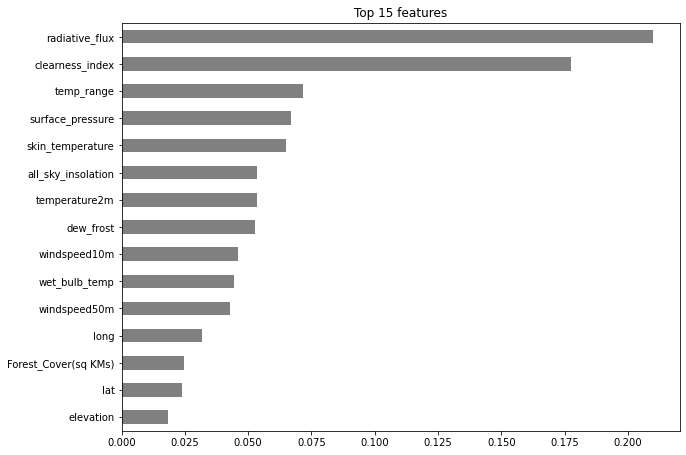

In [24]:
# Getting the feature importances
rf = pipeline_randomforest_OE.named_steps['randomforestregressor']
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)
# rf.feature_importances_
#plot the top 20 feature importances
import matplotlib.pyplot as plt
n=15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

## Model Pipeline instantiating and fitting model using RandomForestRegressor and OneHotEncoder

In [25]:
# train using RandomForestRegressor
start_time = time.time()
pipeline_randomforest_OHE = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(n_estimators=100, random_state=42, verbose=1,n_jobs=-1)
)
pipeline_randomforest_OHE.fit(X_train, y_train)
print('Time took to fit model: ', time.time() - start_time)

C:\Users\rob_rog\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.0min finished


Time took to fit model:  315.19694113731384


### Train Test Scores

In [26]:
# print the train and test scores
print('Training score using randomforest and OneHotEncoder pipeline is: ',pipeline_randomforest_OHE.score(X_train, y_train)) # this value came to be 0.248 in the first run
print('Validation score using randomforest and OneHotEncoder pipeline is: ',pipeline_randomforest_OHE.score(X_val, y_val)) # this value came to be 0.248 in the first run

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.3s finished


Training score using randomforest and OneHotEncoder pipeline is:  0.9370555808321993
Validation score using randomforest and OneHotEncoder pipeline is:  0.4776211128996587


The results from the OneHotEncoder are better than OrdinalEncoder
Training score using randomforest and OneHotEncoder pipeline is:  0.9370698961679538
Validation score using randomforest and OneHotEncoder pipeline is:  0.45993200358668196

### Check the model improvement from baseline

In [27]:
# calculating the mae value from the predicted
model_mae = mean_absolute_error(y_val, pipeline_randomforest_OHE.predict(X_val))
print('Baseline MAE was',baseline_mae)
print('Model MAE is',model_mae)

# calculate the improvement in mae
print('Improvement in the MAE in % is',((baseline_mae/model_mae)-1)*100,'%')

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.3s finished


Baseline MAE was 3.379381267608781
Model MAE is 1.9659160057077623
Improvement in the MAE in % is 71.89855811729595 %


---
## Model Pipeline instantiating and fitting model using xgboost and OrdinalEncoder

In [28]:
# updating the train, validation and test split to check if they can run fast too
# doing a train, validate and test split
train = df[(df['date'].dt.year > 2000) & (df['date'].dt.year <= 2012)]
val = df[(df['date'].dt.year >= 2013) & (df['date'].dt.year <= 2016)]
test = df[(df['date'].dt.year > 2016) & (df['date'].dt.year <= 2020)]

# temporarily having smaller train, val and test to reduce model runtime
# train = df[(df['date'].dt.year > 2008) & (df['date'].dt.year <= 2012)]
# val = df[(df['date'].dt.year == 2013)]
# test = df[(df['date'].dt.year == 2014)]


## Setting features and target

In [31]:
# set the target name and features names
target = 'precipitation'
features = ['country_code', 'lat', 'long', 'elevation', 'surface_pressure', 'skin_temperature', 'dew_frost', 'temperature2m', 'windspeed10m', 'windspeed50m', 'wet_bulb_temp', 'temp_range', 'clearness_index', 'clear_sky_insolation', 'all_sky_insolation', 'radiative_flux']

# setting train, val and test features and targets
X_train = train[features]
X_val = val[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]
y_test = test[target]

print(f'Shape of Train, Validation and Test set is as follows: \n 1. Train: {train.shape} \n 2. Validation: {val.shape} \n 3. Test: {test.shape}')


Shape of Train, Validation and Test set is as follows: 
 1. Train: (1051920, 23) 
 2. Validation: (350640, 23) 
 3. Test: (350640, 23)


In [32]:
# train using RandomForestRegressor
from xgboost import XGBRegressor
start_time = time.time()
pipeline_xgboost = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)
)
pipeline_xgboost.fit(X_train, y_train)
print('Time took to fit model: ', time.time() - start_time)

[00:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Time took to fit model:  11.679587841033936


### Train Test Scores

In [33]:
# print the train and test scores
print('Training score using XGBRegressor and OrdinalEncoder pipeline is: ',pipeline_xgboost.score(X_train, y_train)) # this value came to be 0.248 in the first run
print('Validation score using XGBRegressor and OrdinalEncoder pipeline is: ',pipeline_xgboost.score(X_val, y_val)) # this value came to be 0
# .248 in the first run
#
# Previously with smaller train and validation
# Training score using XGBRegressor and OneHotEncoder pipeline is:  0.6280475738176452
# Validation score using XGBRegressor and OneHotEncoder pipeline is:  0.46880255869498677

# Training score using XGBRegressor and OrdinalEncoder pipeline is:  0.6426014031903633
# Validation score using XGBRegressor and OrdinalEncoder pipeline is:  0.4623325254117493

# with 1 million test and 350k validation
# Training score using XGBRegressor and OrdinalEncoder pipeline is:  0.5899809946697769
# Validation score using XGBRegressor and OrdinalEncoder pipeline is:  0.4845603786795435

Training score using XGBRegressor and OrdinalEncoder pipeline is:  0.5899809946697769
Validation score using XGBRegressor and OrdinalEncoder pipeline is:  0.4845603786795435


## Get feature importances for XGBRegressor and OneHotEncoder

<AxesSubplot:title={'center':'Top 15 features'}>

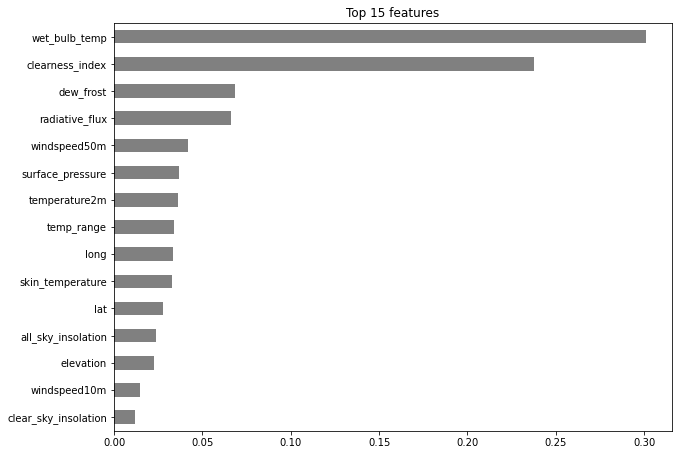

In [34]:
# Getting the feature importances
rf = pipeline_xgboost.named_steps['xgbregressor']
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)
# rf.feature_importances_
#plot the top 20 feature importances
import matplotlib.pyplot as plt
n=15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

### Check the model improvement from baseline

In [35]:
from sklearn.metrics import r2_score
# calculating the mae value from the predicted
model_mae = mean_absolute_error(y_val, pipeline_xgboost.predict(X_val))
print('Baseline MAE was',baseline_mae)
print('Model MAE is',model_mae)

# calculate the improvement in mae
print('Improvement in the MAE in % is',((baseline_mae/model_mae)-1)*100,'%')
# print R2 value on the validation data
print('Gradient Boosting R^2', r2_score(y_val, pipeline_xgboost.predict(X_val)))

Baseline MAE was 3.379381267608781
Model MAE is 2.0224326683964917
Improvement in the MAE in % is 67.09487145933817 %
Gradient Boosting R^2 0.4845603786795435


## Get model's permutation importances

In [37]:
# first transform the X_val so that PermutationImportance can be applied
from sklearn.impute import SimpleImputer
transformer = make_pipeline(
    ce.OrdinalEncoder()
)

# Transform the X_train and X_val dataframe
X_train_transformed = transformer.fit_transform(X_train)
X_val_transformed = transformer.transform(X_val)

# define the model to use in the permuter as estimator
model_xgboost = XGBRegressor(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)

#fit the model
model_xgboost.fit(X_train_transformed, y_train)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model_xgboost,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=42
)
# permuter run on X_val instead of X_train as in the case of droping column to 
# see the importance of any feature
permuter.fit(X_val_transformed, y_val)

[00:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             gpu_id=-1, importance_type='gain',
                                             interaction_constraints='',
                                             learning_rate=0.300000012,
                                             max_delta_step=0, max_depth=6,
                                             min_child_weight=1, missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=-1,
                                             num_parallel_tree=1,
                                             random_state=42, reg_alpha=0,
                                             reg_l

In [38]:
# get the feature importances
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

wet_bulb_temp           4.243517
temperature2m           4.026949
dew_frost               3.840664
surface_pressure        2.296091
elevation               1.112079
skin_temperature        0.950047
clearness_index         0.817683
radiative_flux          0.694799
temp_range              0.681316
all_sky_insolation      0.435900
lat                     0.399761
long                    0.355520
windspeed10m            0.126339
windspeed50m            0.114761
clear_sky_insolation    0.072487
country_code            0.043519
dtype: float64

In [39]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
4.2435 ± 0.0318,wet_bulb_temp
4.0269 ± 0.0280,temperature2m
3.8407 ± 0.0193,dew_frost
2.2961 ± 0.0160,surface_pressure
1.1121 ± 0.0017,elevation
0.9500 ± 0.0064,skin_temperature
0.8177 ± 0.0034,clearness_index
0.6948 ± 0.0046,radiative_flux
0.6813 ± 0.0014,temp_range
0.4359 ± 0.0028,all_sky_insolation


# Module 4 Assignment
### Make at least 1 partial dependence plot to explain your model.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='wet_bulb_temp'>})

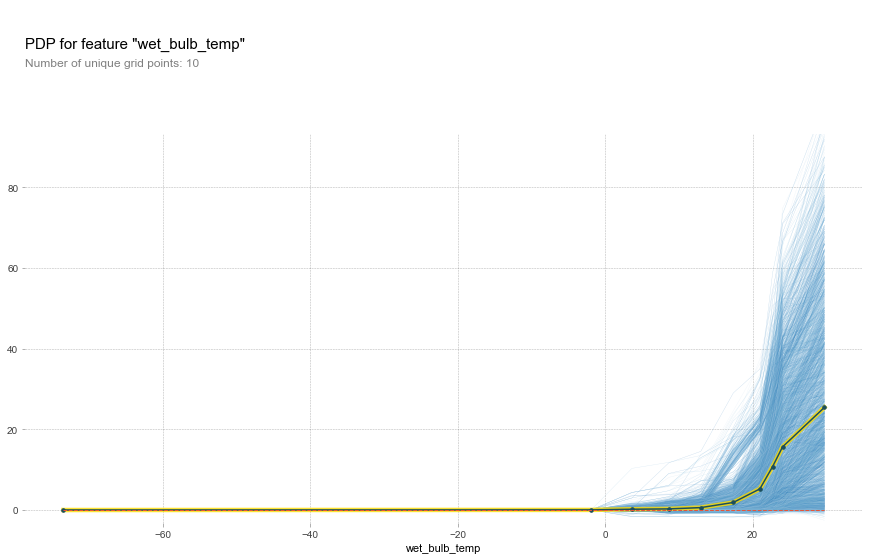

In [41]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import matplotlib.pyplot as plt
#increase the dpi (doubt it) so that the text does not looks funny
plt.rcParams['figure.dpi'] = 72

# Partial Dependence Plot with 1 feature
feature = 'wet_bulb_temp'
isolated = pdp_isolate(
    model=pipeline_xgboost,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=10
)

pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01)


(<Figure size 756x900 with 5 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': {'_pdp_x_ax': <AxesSubplot:xlabel='wet_bulb_temp'>,
   '_pdp_y_ax': <AxesSubplot:ylabel='radiative_flux'>,
   '_pdp_inter_ax': <AxesSubplot:>}})

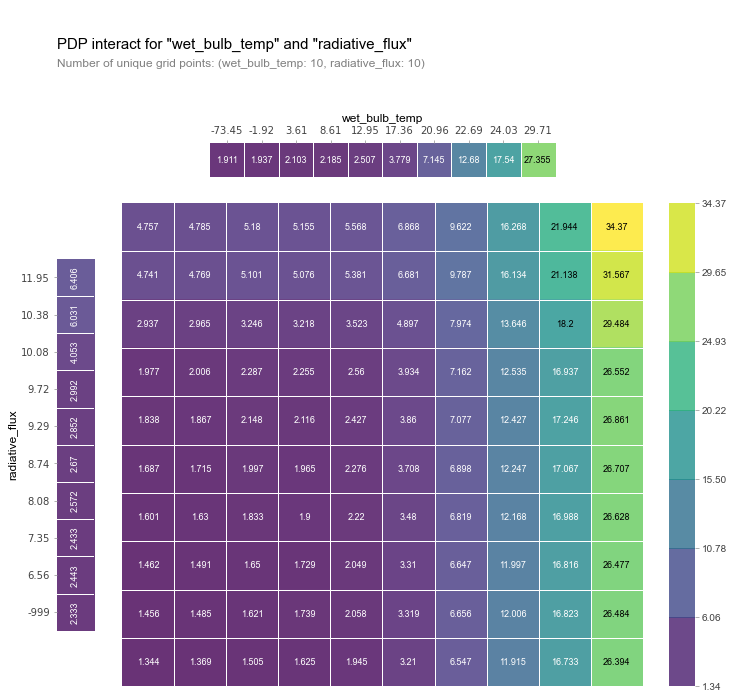

In [42]:
# Partial Dependence Plot with 2 feature
features = ['wet_bulb_temp', 'radiative_flux']

# PDP interact instance object
interaction = pdp_interact(
    model=pipeline_xgboost,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)
# plot
pdp_interact_plot(interaction, feature_names=features, plot_type='grid', plot_pdp=True)

In [43]:
## 3D plot with plotly

# first make a 2-D pplot above

pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

pdp = pdp.drop(columns=[-73.45])
pdp = pdp.drop(-999.00)

import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]),
        yaxis=dict(title=features[1]),
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()


ModuleNotFoundError: No module named 'plotly'

### Make at least 1 Shapley force plot to explain an individual prediction

In [ ]:
row = X_val.iloc[[0]] # dataframe with a single row (doube bracket to keep it in a dataframe)
row

pipeline_xgboost.predict(row)

In [ ]:
## Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.pipeline.Pipeline'>
# received this error while running xgboost pipeline therefore making a simple regressor
# without a pipeline and attempting shap

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
model_xgboost = XGBRegressor(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)
model_xgboost.fit(X_train_encoded, y_train)

In [ ]:
# predict
X_val_encoded = encoder.transform(X_val)
X_val_encoded
row = X_val_encoded.iloc[[0]]
model_xgboost.predict(row)
row

In [ ]:
import shap

# changing the row

explainer = shap.TreeExplainer(model_xgboost)
shap_values = explainer.shap_values(row)
# shap values are what the features contribute to the final predicted value
# need to initialize javascript for shap to run
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values=shap_values[0,:],
    features=row,
    matplotlib=True
)

In [1]:
train.head()

NameError: name 'train' is not defined